In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew,kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import mstats


#Extra setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',None)
warnings.filterwarnings("ignore")

In [66]:
#Loading train and test data
try:
    train_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/train.csv')
    test_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/test.csv')
    print("Train df shape: " ,train_df.shape)
    print("Test df shape: ", test_df.shape)

except FileNotFoundError:
    print('File not loaded')

Train df shape:  (891, 12)
Test df shape:  (418, 11)


In [67]:
#Null check function
def null_zero_check(df):
    null_values = df.isnull().sum()
    zero_values = null_values[null_values == 0]
    Total_record_count=df.shape[0]
    dataype = df.dtypes
    summary_df = pd.DataFrame({'Null count': null_values,
                               'Null_count_percent': null_values/Total_record_count*100,
                                'Zero count': zero_values,
                                'Zero_count_percent': zero_values/Total_record_count*100,
                                'Datatype': dataype})
    return summary_df

#Crosscheck Feature dTypes
def check_feature_dtypes(train_df, test_df):
    common_cols=train_df.columns.intersection(test_df.columns)
    mismatched_dtypes = []
    for col in common_cols:
        if train_df[col].dtype != test_df[col].dtype:
            mismatched_dtypes.append(
                (col, {"train": train_df[col].dtype, "test": test_df[col].dtype})
            )

    # Return True if no mismatches, False otherwise
    if not mismatched_dtypes:
        return True, mismatched_dtypes
    else:
        return False, mismatched_dtypes
    
#Function to Combine train and test data.Remove target from the train data before combining

def combine_df(df1,df2,tgt_col):
    trin_df_drop=df1.drop([tgt_col],axis=1)
    combined_df=pd.concat([trin_df_drop,df2],axis=0)
    return combined_df

#Function to check for duplicates 
def check_duplicates(df, columns=None):
    if columns is None:
        columns = df.columns

    duplicates = df[df.duplicated(subset=columns, keep=False)]
    return duplicates

#Final report generation
def perform_data_analysis(train_df, test_df,columns=None):
    print('Null check in train_df:')
    display(null_zero_check(train_df))
    print('Null check in test_df:')
    display(null_zero_check(test_df))
    print('Null check in combined_df:')
    combined_df=combine_df(train_df,test_df,'Survived')
    print('Combined_df shape: ',combined_df.shape)
    print('Is rows in train_df + test_df = combined_df?',train_df.shape[0]+test_df.shape[0]==combined_df.shape[0])
    display(null_zero_check(combined_df))

    print("Check describe for train_df")
    display(train_df.describe(include='all').T)
    print("Check describe for test_df")
    display(test_df.describe(include='all').T)
    print("Check describe for combined_df")
    display(combined_df.describe(include='all').T)

    print('Check for dataype mismatch between Train and Test.If True then no mismatch:',check_feature_dtypes(train_df, test_df))

    print('Check for duplicates in train_df')
    display(check_duplicates(train_df,columns))

    print('Check for duplicates in test_df')
    display(check_duplicates(test_df,columns))  

    print('Check for duplicates in combined_df')
    display(check_duplicates(combined_df,columns))

def model_training(train_df, test_df, train_survived):
    model = LogisticRegression()
    model.fit(train_df, train_survived)
    prediction = model.predict(test_df)
    return prediction

In [68]:
perform_data_analysis(train_df,test_df)

Null check in train_df:


,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,177,19.865320,NaN,NaN,float64
Cabin,687,77.104377,NaN,NaN,object
Embarked,2,0.224467,NaN,NaN,object
Fare,0,0.000000,0.0,0.0,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


Null check in test_df:


,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,86,20.574163,NaN,NaN,float64
Cabin,327,78.229665,NaN,NaN,object
Embarked,0,0.000000,0.0,0.0,object
Fare,1,0.239234,NaN,NaN,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


Null check in combined_df:
Combined_df shape:  (1309, 11)
Is rows in train_df + test_df = combined_df? True


,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,263,20.091673,NaN,NaN,float64
Cabin,1014,77.463713,NaN,NaN,object
Embarked,2,0.152788,NaN,NaN,object
Fare,1,0.076394,NaN,NaN,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


Check describe for train_df


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Check describe for test_df


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check describe for combined_df


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for dataype mismatch between Train and Test.If True then no mismatch: (True, [])
Check for duplicates in train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Check for duplicates in test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Check for duplicates in combined_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [69]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
#Creating Bechmark model
train_df_benchmark=train_df.copy()
train_df_benchmark=train_df_benchmark[['Age', 'Fare', 'Parch', 'SibSp']]
display(train_df_benchmark.sample(2))

test_df_benchmark=test_df.copy()
test_df_benchmark=test_df_benchmark[['Age', 'Fare', 'Parch', 'SibSp']]
display(test_df_benchmark.sample(2))

train_df_benchmark=train_df_benchmark.fillna(0)
test_df_benchmark=test_df_benchmark.fillna(0)

train_survived=train_df['Survived']
display(train_survived.sample(2))


,Age,Fare,Parch,SibSp
446,13.0,19.5000,1,0
677,18.0,9.8417,0,0


,Age,Fare,Parch,SibSp
34,30.0,57.7500,0,1
283,9.0,15.2458,1,1


799    0
64     0
Name: Survived, dtype: int64

In [71]:
pred=model_training(train_df_benchmark, test_df_benchmark, train_survived)
pred_df=pd.DataFrame(pred)
pred_df.to_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/Predictions/benchmark.csv')
print(train_df_benchmark.shape,test_df_benchmark.shape,pred_df.shape)


(891, 4) (418, 4) (418, 1)


In [72]:
#Treating numeric variables
num_cols=['Age','Fare','Parch','SibSp']
print("Numeric columns in train:\n\n",null_zero_check(train_df[num_cols]))
print("\nNumeric columns in test:\n\n",null_zero_check(test_df[num_cols]))

#Age is having null count

Numeric columns in train:

        Null count  Null_count_percent  Zero count  Zero_count_percent Datatype
Age           177            19.86532         NaN                 NaN  float64
Fare            0             0.00000         0.0                 0.0  float64
Parch           0             0.00000         0.0                 0.0    int64
SibSp           0             0.00000         0.0                 0.0    int64

Numeric columns in test:

        Null count  Null_count_percent  Zero count  Zero_count_percent Datatype
Age            86           20.574163         NaN                 NaN  float64
Fare            1            0.239234         NaN                 NaN  float64
Parch           0            0.000000         0.0                 0.0    int64
SibSp           0            0.000000         0.0                 0.0    int64


In [73]:
train_df_null_age=train_df[train_df['Age'].isnull()]
train_df_null_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 5 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  177 non-null    int64  
 1   Survived     177 non-null    int64  
 2   Pclass       177 non-null    int64  
 3   Name         177 non-null    object 
 4   Sex          177 non-null    object 
 5   Age          0 non-null      float64
 6   SibSp        177 non-null    int64  
 7   Parch        177 non-null    int64  
 8   Ticket       177 non-null    object 
 9   Fare         177 non-null    float64
 10  Cabin        19 non-null     object 
 11  Embarked     177 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


In [74]:
train_df_null_age.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,177.000000,177.000000,177.000000,177,177,0.0,177.000000,177.000000,177,177.000000,19,177
unique,NaN,NaN,NaN,177,2,NaN,NaN,NaN,155,NaN,19,3
top,NaN,NaN,NaN,"Moran, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,B78,S
freq,NaN,NaN,NaN,1,124,NaN,NaN,NaN,7,NaN,1,90
mean,435.581921,0.293785,2.598870,NaN,NaN,NaN,0.564972,0.180791,NaN,22.158567,NaN,NaN
std,250.552901,0.456787,0.763216,NaN,NaN,NaN,1.626316,0.534145,NaN,31.874608,NaN,NaN
min,6.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,230.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.750000,NaN,NaN
50%,452.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,8.050000,NaN,NaN
75%,634.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.150000,NaN,NaN


In [75]:
train_df_not_null_age=train_df[train_df['Age'].notnull()]
train_df_not_null_age.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,714.000000,714.000000,714.000000,714,714,714.000000,714.000000,714.000000,714,714.000000,185,712
unique,NaN,NaN,NaN,714,2,NaN,NaN,NaN,542,NaN,134,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,4,554
mean,448.582633,0.406162,2.236695,NaN,NaN,29.699118,0.512605,0.431373,NaN,34.694514,NaN,NaN
std,259.119524,0.491460,0.838250,NaN,NaN,14.526497,0.929783,0.853289,NaN,52.918930,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,222.250000,0.000000,1.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,8.050000,NaN,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.741700,NaN,NaN
75%,677.750000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.375000,NaN,NaN


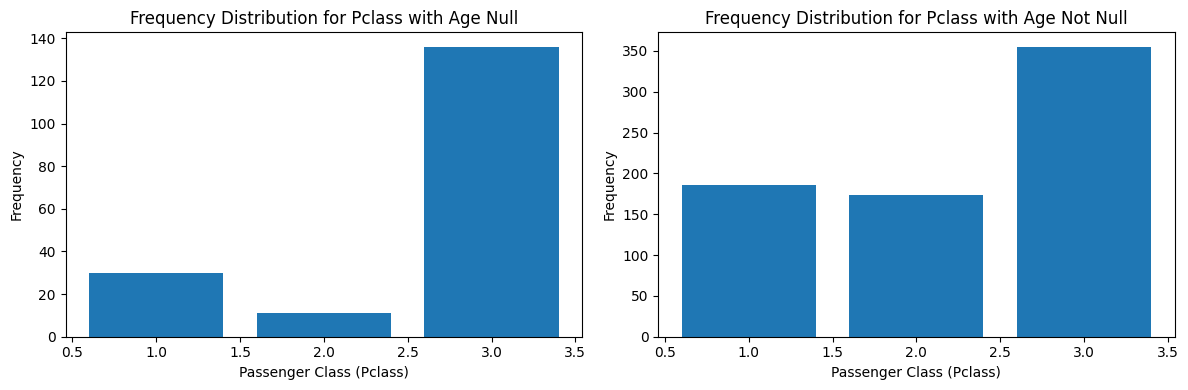

In [76]:
pclass_counts_null_age = train_df_null_age['Pclass'].value_counts()
pclass_counts_not_null_age = train_df_not_null_age['Pclass'].value_counts()

fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].bar(pclass_counts_null_age.index, pclass_counts_null_age.values)
axes[0].set_xlabel('Passenger Class (Pclass)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency Distribution for Pclass with Age Null')

axes[1].bar(pclass_counts_not_null_age.index, pclass_counts_not_null_age.values)
axes[1].set_xlabel('Passenger Class (Pclass)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency Distribution for Pclass with Age Not Null')

plt.tight_layout()
plt.show()

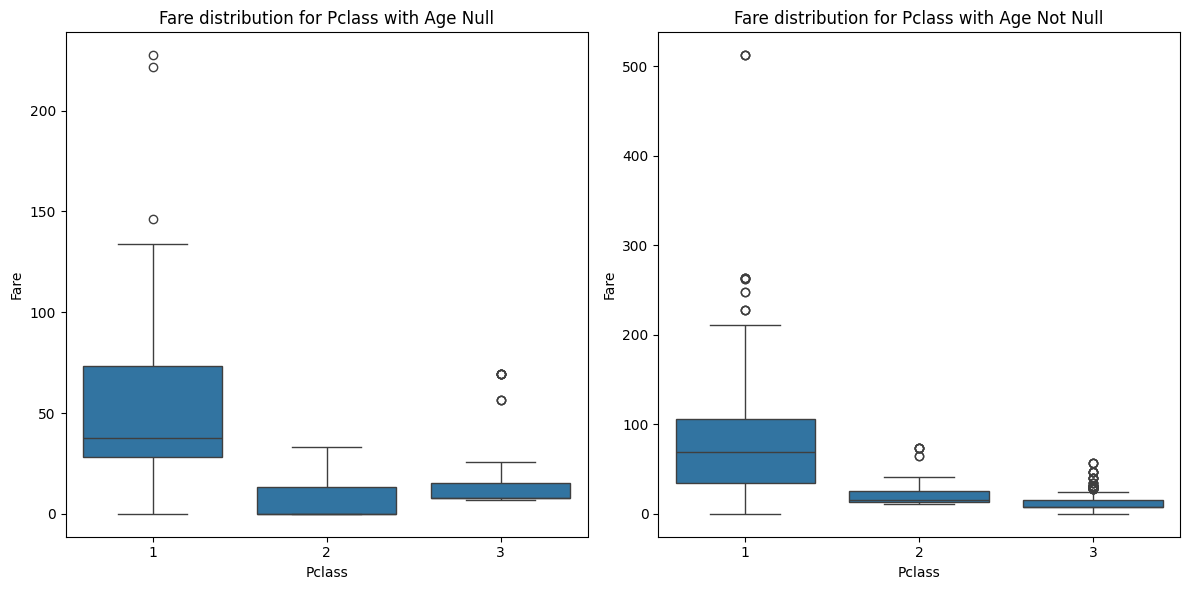

In [77]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.boxplot(x='Pclass',y='Fare',data=train_df_null_age,ax=axes[0])
axes[0].set_title('Fare distribution for Pclass with Age Null')

sns.boxplot(x='Pclass',y='Fare',data=train_df_not_null_age,ax=axes[1])
axes[1].set_title('Fare distribution for Pclass with Age Not Null')

plt.tight_layout()
plt.show()

In [78]:
#Filling the missing values for age
train_df_null_age['Age']=train_df_null_age.groupby(['Pclass','Embarked','Cabin'])['Age'].transform(lambda x: x.fillna(x.median()))

In [79]:
null_zero_check(train_df_null_age)

,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,177,100.000000,NaN,NaN,float64
Cabin,158,89.265537,NaN,NaN,object
Embarked,0,0.000000,0.0,0.0,object
Fare,0,0.000000,0.0,0.0,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


In [80]:
train_df_null_age[train_df_null_age['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [81]:
#Preparing for model 2
train_df_model_2=train_df.copy()
train_df_model_2['Age']=train_df_model_2.groupby(['Pclass','Embarked'])['Age'].transform(lambda x: x.fillna(x.median()))
train_df_model_2['Age'] = train_df_model_2['Age'].fillna(train_df_model_2['Age'].median()) 


test_df_model_2=test_df.copy()
test_df_model_2['Age']=test_df_model_2.groupby(['Pclass','Embarked'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df_model_2['Age'] = test_df_model_2['Age'].fillna(test_df_model_2['Age'].median())
test_df_model_2['Fare'] = test_df_model_2['Fare'].fillna(test_df_model_2['Fare'].median())


In [82]:
#Null check for age in Combined_df
null_zero_check(test_df_model_2)

,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,0,0.000000,0.0,0.0,float64
Cabin,327,78.229665,NaN,NaN,object
Embarked,0,0.000000,0.0,0.0,object
Fare,0,0.000000,0.0,0.0,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


In [83]:
train_df_model_2=train_df_model_2[num_cols]
test_df_model_2=test_df_model_2[num_cols]
print(train_df_model_2.shape,test_df_model_2.shape)

(891, 4) (418, 4)


In [84]:
#Model 2
pred=model_training(train_df_model_2, test_df_model_2, train_survived)
pred_df=pd.DataFrame(pred)
pred_df.to_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/Predictions/model2.csv')
print(train_df_model_2.shape,test_df_model_2.shape,pred_df.shape)


(891, 4) (418, 4) (418, 1)


In [85]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [86]:
#Checking for skewness and kurtosis
train_df_model_2=train_df_model_2.copy()
test_df_model_2=test_df_model_2.copy()


In [87]:
skewness_values=train_df_model_2.apply(skew)
kurtosis_values=train_df_model_2.apply(kurtosis)
print(skewness_values)
print('\n')
print(kurtosis_values)

Age      0.561132
Fare     4.779253
Parch    2.744487
SibSp    3.689128
dtype: float64


Age       0.711620
Fare     33.204289
Parch     9.716613
SibSp    17.773512
dtype: float64


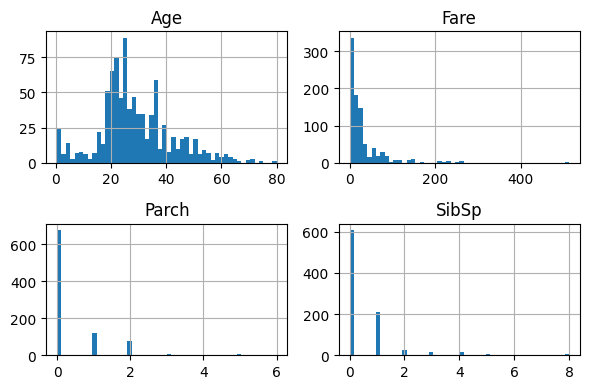

In [88]:
summary_df=pd.DataFrame({
    'Skewness':skewness_values,
    'kurtosis_values':kurtosis_values
},index=train_df_model_2.columns)

#display(summary_df)

train_df_model_2.hist(figsize=(6, 4), bins=50) 
plt.tight_layout()  # Prevent overlapping plots
plt.show() 

In [89]:
# 1)Divide training data into training and testing
# 2)Build logistic regression model
# 3)Predict on test data
# 4)evaluate the model

X_Train=train_df_model_2.copy()
Y_Train=train_survived.copy()

In [90]:
X_Train.head(5)

,Age,Fare,Parch,SibSp
0,22.0,7.2500,0,1
1,38.0,71.2833,0,1
2,26.0,7.9250,0,0
3,35.0,53.1000,0,1
4,35.0,8.0500,0,0


In [97]:


def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    """Trains and evaluates a logistic regression model."""
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
    }

def preprocess_and_evaluate(X_train, X_test, y_train, y_test, method='log'):
    X_train = X_train.copy()
    X_test = X_test.copy()

    print(f"Skewness before {method} transformation:")
    print(X_train.skew())

    for col in X_train.columns:
        if method == 'log' : #and X_train[col].skew() > 0.75:
            X_train[col] = np.log1p(X_train[col])
            X_test[col] = np.log1p(X_test[col])
        elif method == 'sqrt':# and X_train[col].skew() > 0.75:

            X_train[col] = np.sqrt(np.abs(X_train[col]))
            X_test[col] = np.sqrt(np.abs(X_test[col])) 
        elif method == 'winsorize':# and X_train[col].skew() > 0.75:
            X_train[col] = winsorize(X_train[col], limits=[0.05, 0.05])
            X_test[col] = winsorize(X_test[col], limits=[0.05, 0.05])
        # If method is 'None', no transformation is applied

    print(f"Skewness after {method} transformation:")
    print(X_train.skew())

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return evaluate_logistic_regression(X_train, X_test, y_train, y_test)

# Assuming train_df_model_2 and test_df_model_2 are your train and test datasets
results = {}
for method in ['log', 'sqrt', 'winsorize', 'No_Transform']:
    X_train = train_df_model_2.copy()
    y_train = train_survived.copy()

    X_train, X_test, y_train, y_test = train_test_split(
        X_train,y_train , test_size=0.2, random_state=42
    )
    
    results[method] = preprocess_and_evaluate(X_train, X_test, y_train, y_test, method)

results_df = pd.DataFrame.from_dict(results, orient='index')
display(results_df)


Skewness before log transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after log transformation:
Age     -2.078895
Fare     0.403554
Parch    1.644045
SibSp    1.677430
dtype: float64
Skewness before sqrt transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after sqrt transformation:
Age     -0.701576
Fare     2.157293
Parch    1.504638
SibSp    1.461343
dtype: float64
Skewness before winsorize transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after winsorize transformation:
Age      0.268290
Fare     1.844639
Parch    1.669617
SibSp    1.903832
dtype: float64
Skewness before No_Transform transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after No_Transform transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dty

,Accuracy,Precision,Recall,F1-Score
log,0.709497,0.789474,0.405405,0.535714
sqrt,0.692737,0.827586,0.324324,0.466019
winsorize,0.681564,0.774194,0.324324,0.457143
No_Transform,0.681564,0.814815,0.297297,0.435644


In [ ]:
#With log in age
Accuracy	Precision	Recall	F1-Score
log	0.709497	0.789474	0.405405	0.535714
sqrt	0.692737	0.827586	0.324324	0.466019
winsorize	0.681564	0.774194	0.324324	0.457143
No_Transform	0.681564	0.814815	0.297297	0.435644

# skew>=0.75-WITHOUT LOG for all transform
	Accuracy	Precision	Recall	F1-Score
log	0.692737	0.756757	0.378378	0.504505
sqrt	0.692737	0.827586	0.324324	0.466019
winsorize	0.692737	0.827586	0.324324	0.466019
No_Transform	0.681564	0.814815	0.297297	0.435644

#fixed sqrt transform
Accuracy	Precision	Recall	F1-Score
log	0.709497	0.789474	0.405405	0.535714
sqrt	0.692737	0.827586	0.324324	0.466019
winsorize	0.681564	0.774194	0.324324	0.457143
No_Transform	0.681564	0.814815	0.297297	0.435644
